In [2]:
from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape(-1,28,28,1)/255.0
test_images = test_images.reshape(-1,28,28,1)/255.0

from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
from tensorflow.keras.models import load_model
model = load_model('/content/cnn_model.keras')

In [5]:
for layer in model.layers:
  print(layer.name)

conv2d_12
max_pooling2d_12
dropout_18
conv2d_13
max_pooling2d_13
dropout_19
flatten_6
dense_12
dropout_20
dense_13


In [6]:
for  layer in model.layers:
  layer.trainable=True

In [7]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=5,validation_data=(test_images,test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 0.7002 - loss: 0.8887 - val_accuracy: 0.8521 - val_loss: 0.4073
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.8343 - loss: 0.4529 - val_accuracy: 0.8750 - val_loss: 0.3460
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 23ms/step - accuracy: 0.8509 - loss: 0.4058 - val_accuracy: 0.8804 - val_loss: 0.3275
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.8641 - loss: 0.3731 - val_accuracy: 0.8896 - val_loss: 0.3079
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.8686 - loss: 0.3588 - val_accuracy: 0.8942 - val_loss: 0.2984


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8956 - loss: 0.2993
Test accuracy: 0.8942
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[9 2 1 1 6]


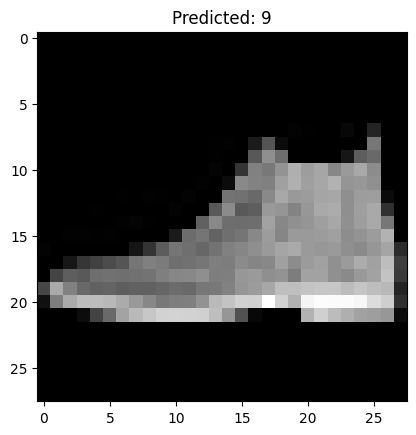

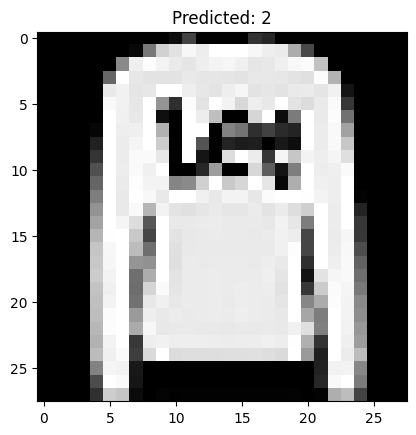

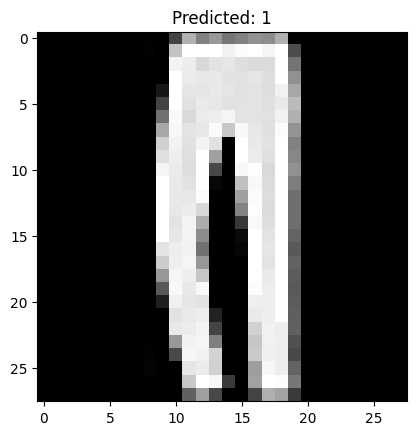

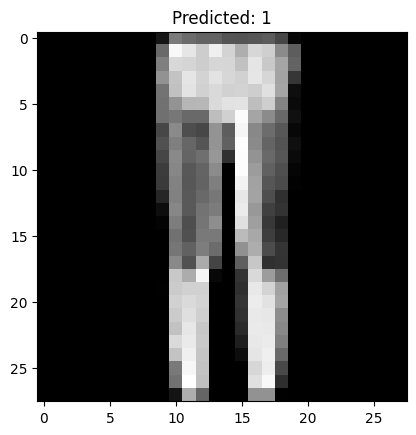

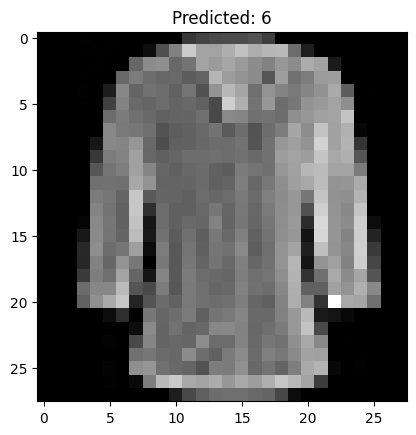

In [15]:
import matplotlib.pyplot as plt
import numpy as np

loss, acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {acc:.4f}")

preds = model.predict(test_images[:5])
print(np.argmax(preds, axis=1))

for i in range(5):
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(preds[i])}")
    plt.show()


# 0 – T-shirt/top
# 1 – Trouser
# 2 – Pullover
# 3 – Dress
# 4 – Coat
# 5 – Sandal
# 6 – Shirt
# 7 – Sneaker
# 8 – Bag
# 9 – Ankle boot
